In [1]:
# import necessary libraries to run choppe and analyze its results

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.utils import shuffle

# to run this notebook you also need to have installed ramnspy
# you can do that using the following command: pip install ramanspy 
import ramanspy as rp

# set the plot style

params= { 'font.family':'sans-serif',
            "font.weight":"bold",
                'xtick.labelsize':10,
                'ytick.labelsize':10
    }

matplotlib.rcParams.update(params)

In [2]:
# read and store the input spectra
X_train, y_train=rp.datasets.bacteria("train", folder="bacteria_data")
wavenumbers = X_train.spectral_axis
y_labels, antibiotics_labels = rp.datasets.bacteria("labels")

# shuffle to be sure that we do not introduce bias in our dataset
X, y= shuffle(X_train, y_train, random_state=42)

# we want to retain only the spectra of E.coli 1, MSSA 2 and C. albicans
print(y_labels[0], y_labels[3], y_labels[18])
print(antibiotics_labels[0], antibiotics_labels[1], antibiotics_labels[16])

spectra=[]
true_labels=[]

for i in range(len(y)):
    if y_labels[y[i]]=="E. coli 1" or y_labels[y[i]]=="MSSA 2" or y_labels[y[i]]=="C. albicans":
        spectra.append(rp.preprocessing.normalise.MinMax().apply(X[i]).spectral_data)
        true_labels.append(y[i])

print(true_labels)

spectra=np.array(spectra)
wavenumbers = X.spectral_axis

C. albicans E. coli 1 MSSA 2
Caspofungin Caspofungin Vancomycin
[18, 18, 18, 0, 18, 3, 0, 0, 18, 18, 18, 3, 0, 18, 18, 18, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 18, 0, 3, 18, 18, 3, 18, 0, 3, 3, 3, 3, 18, 18, 18, 18, 3, 18, 3, 0, 3, 0, 18, 18, 0, 3, 0, 18, 0, 0, 0, 0, 3, 18, 18, 3, 0, 3, 18, 18, 3, 0, 0, 3, 0, 18, 0, 18, 0, 3, 0, 3, 3, 0, 3, 3, 0, 18, 3, 18, 18, 3, 3, 3, 18, 18, 3, 3, 0, 18, 0, 3, 18, 18, 0, 18, 3, 0, 18, 3, 0, 18, 18, 0, 0, 3, 18, 3, 0, 3, 18, 3, 3, 3, 0, 0, 18, 3, 0, 0, 18, 18, 3, 3, 18, 18, 0, 3, 3, 18, 0, 3, 18, 18, 0, 18, 0, 3, 0, 18, 18, 18, 0, 0, 18, 18, 0, 18, 18, 18, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 18, 0, 3, 18, 0, 3, 18, 3, 3, 0, 3, 18, 3, 3, 0, 18, 3, 18, 0, 0, 0, 0, 0, 0, 3, 3, 3, 18, 0, 0, 0, 3, 0, 0, 3, 18, 18, 0, 0, 3, 3, 0, 3, 3, 18, 3, 18, 0, 0, 18, 18, 3, 0, 3, 0, 18, 3, 3, 0, 3, 3, 3, 0, 0, 0, 18, 0, 18, 0, 18, 18, 0, 0, 18, 18, 3, 3, 3, 18, 0, 0, 18, 18, 0, 0, 18, 18, 3, 18, 0, 0, 18, 18, 18, 0, 3, 3, 18, 18, 3, 18, 0, 18, 18, 0, 0, 3, 18, 3, 3, 3, 18, 

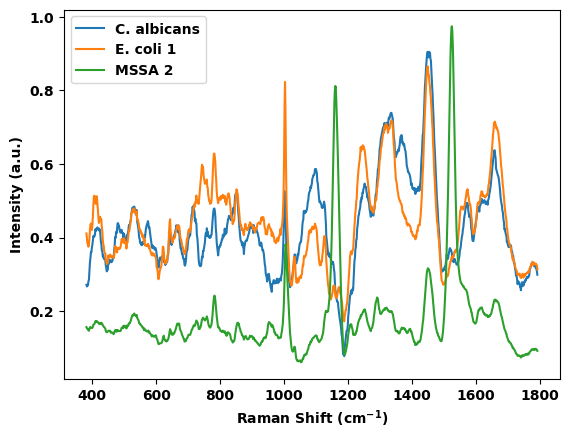

In [3]:
albicans = np.array([s for s, label in zip(spectra, true_labels) if label == 0])
ecoli= np.array([s for s, label in zip(spectra, true_labels) if label == 3])
mssa= np.array([s for s, label in zip(spectra, true_labels) if label == 18])


plt.plot(wavenumbers, np.mean(albicans, axis=0), label=y_labels[0])
plt.plot(wavenumbers, np.mean(ecoli, axis=0), label=y_labels[3])
plt.plot(wavenumbers, np.mean(mssa, axis=0), label=y_labels[18])
plt.legend()
plt.ylabel("Intensity (a.u.)", fontweight="bold")
plt.xlabel(r"Raman Shift (cm$^{-1}$)", fontweight="bold")
plt.show()

In [4]:
# import chopper

import chopper as chopper

In [5]:
# run chopper using the desired flags
# for this example we will use the N_cluster flag !!!

labels, clusters, coefficients, mean_spectra, mean_std= chopper.do_Clustering(input_spectra=spectra, flag_solar_correction=False, flag_PCA=False,
                                                      flag_GMM=False, flag_N_clusters=True)

#########################################################################
################## directly from the ghost crew...... ###################
#########################################################################

ˇ       --~~--_      ˇ 
|____/~/_|  |_\~\____|
    |____________|                    Welcome user :)
    |[][][][][][]|:=  .               I'm here to help you 
  __| __         |__ \  ' .          / with your collection of spectra !
 |  ||. |   ==   |  |  \    ' .     /  
(|  ||__|   ==   |  |)   \      '<
 |  |[] []  ==   |  |      \    '\|
 |  |____________|  |        \    |
 /__\     |_|    /__\          \ / \

#########################################################################
################# chopper.py v1 written by @astro-francy ################
#########################################################################

/~/_|  |_\~\ --- PCA step


/~/_|  |_\~\ --- Clustering step

You checked the #2 GMM flag.

/~/_|  |_\~\ --- Done. Bye :)



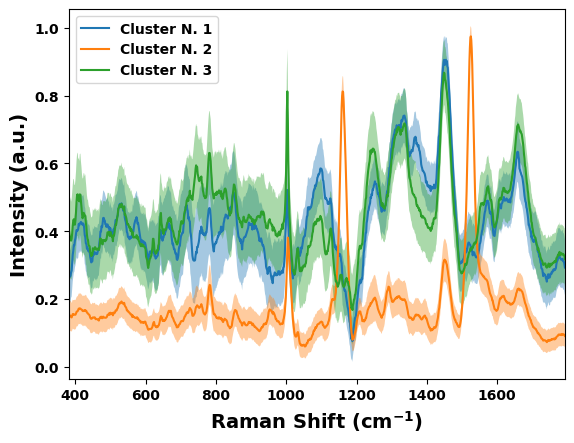

In [6]:
# plot the results 

K=len(mean_spectra[:,0])
wv=wavenumbers


for i in range(K):
    plt.plot(wv, mean_spectra[i], label="Cluster N. "+str(int(i+1)))
    plt.fill_between(wv, mean_spectra[i]-mean_std[i], mean_spectra[i]+mean_std[i], alpha=0.4)
plt.xlim(min(wv), max(wv))
plt.ylabel("Intensity (a.u.)", fontweight="bold", size=14)
plt.xlabel(r"Raman Shift (cm$^{-1}$)", fontweight="bold", size=14)
plt.legend()
plt.show()

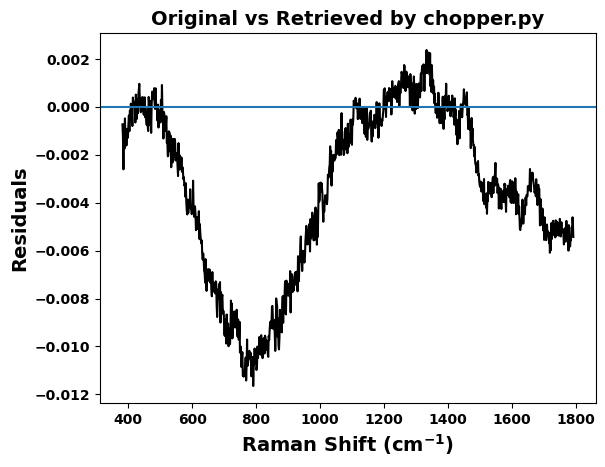

In [7]:
plt.plot(wv, mean_spectra[0]-np.mean(albicans, axis=0), 'k-')
plt.axhline(y=0)
plt.ylabel("Residuals", fontweight="bold", size=14)
plt.xlabel(r"Raman Shift (cm$^{-1}$)", fontweight="bold", size=14)
plt.title("Original vs Retrieved by chopper.py", fontweight="bold", size=14)
plt.show()


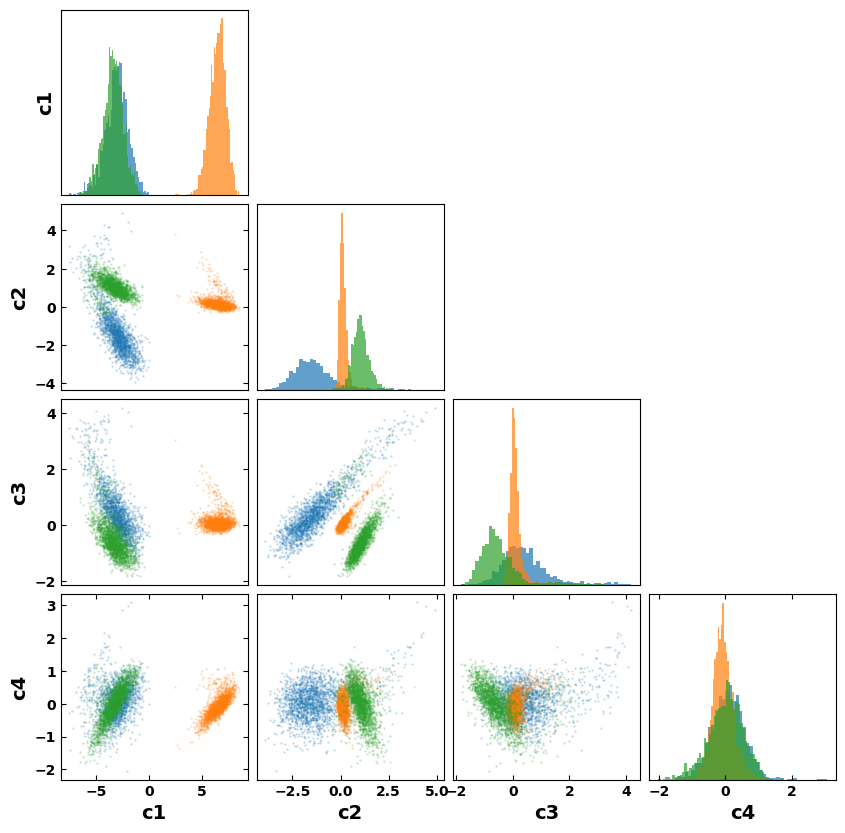

In [8]:
dimensions=4

clabels=[]

for i in range(dimensions):
    clabels.append("c"+str(int(i+1)))

num_variables=dimensions
num_plots = num_variables
fig, axes = plt.subplots(num_plots, num_plots, figsize=(10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for idx, ax in enumerate(axes.flat):
    i = idx // num_variables 
    j = idx % num_variables   

    if j > i:
        ax.set_visible(False)
        continue

    if i == j:
        for cas in range(K):
            x_data=[coefficients[bix,j] for bix in clusters[cas]]
            ax.hist(x_data, bins=50, density=True, histtype='stepfilled', alpha=0.7)
            ax.set_yticks([]) 
    else:
        for hera in range(K):
            x_data=[coefficients[kanan,j] for kanan in clusters[hera]]
            y_data=[coefficients[kanan,i] for kanan in clusters[hera]]
            ax.plot(x_data, y_data, '.', markersize=1, alpha=0.3)


    if i != num_variables - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(clabels[j], fontsize=14, fontweight="bold")
    if j != 0:
        ax.set_yticks([])
    else:
        ax.set_ylabel(clabels[i], fontsize=14, fontweight="bold")
    if i == j and i != num_variables - 1:
        ax.set_xticks([])
    ax.tick_params(direction='in', top=True, right=True, labelsize=10)


plt.show()